### PROJECT FOR PH253

#### ASL PREDICTION USING THE SIGN MNIST DATASET

STUDENTS

GEORGOULIS ILIAS

MOURATIDIS EFSTATHIOS

Datasets

In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience =10, restore_best_weights = True,monitor='val_loss')

In [2]:
df1=pd.read_csv("sign_mnist_train.csv")
df2=pd.read_csv("sign_mnist_test.csv")

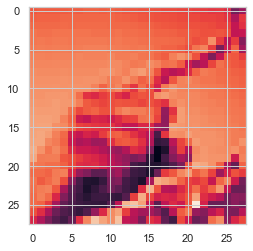

In [3]:
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt
train=df1.values[0:,1:]
train_labels = df1.values[0:,0]
train_labels = to_categorical(train_labels)
sample1 = train[1]
plt.imshow(sample1.reshape((28,28)))


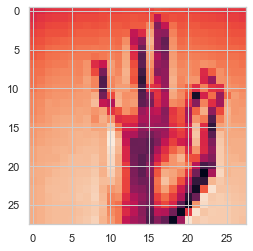

In [4]:
test=df2.values[0:,1:]
test_labels = df2.values[0:,0]
test_labels = to_categorical(test_labels)
sample2 = test[1]
plt.imshow(sample2.reshape((28,28)))

In [5]:
train = train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
train=train.astype('float32') / 255
test=test.astype('float32') / 255

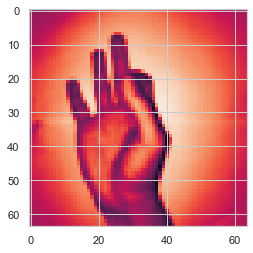

In [6]:
X=np.load('X.npy')
Y=np.load('Y.npy')
plt.imshow(X[0])

Change of image dimension to 50x50

In [7]:
import cv2
img =train[0]
img.shape

(28, 28, 1)

In [8]:
img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img.shape

(28, 28, 3)

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape

(28, 28)

In [10]:
img =cv2.resize(img, (50,50))
img.shape

(50, 50)

In [11]:
img = np.expand_dims(img, axis=2)
img.shape

(50, 50, 1)

Mnist resize

Before 

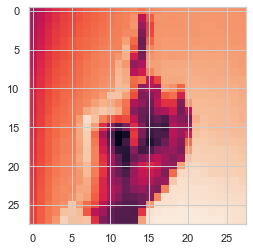

In [12]:
img =train[0]
plt.imshow(img)

In [13]:
xtrain = []
xtest = []
for i in range (len(train)):
    img =train[i]
    img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img =cv2.resize(img, (50,50))
    
    img = np.expand_dims(img, axis=2)
    xtrain.append(img)
xtrain=np.array(xtrain)
#model8.evaluate(train2_test,test_labels)
for i in range (len(test)):
    imgg =test[i]
    imgg=cv2.cvtColor(imgg, cv2.COLOR_RGB2BGR)
    imgg = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
    imgg =cv2.resize(imgg, (50,50))
    
    imgg = np.expand_dims(imgg, axis=2)
    xtest.append(imgg)
xtest=np.array(xtest)

After

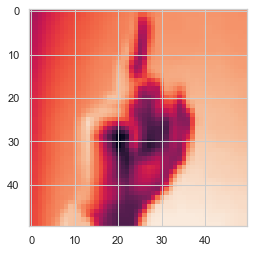

In [14]:
img =xtrain[0]
plt.imshow(img)

Numbers resize

Before

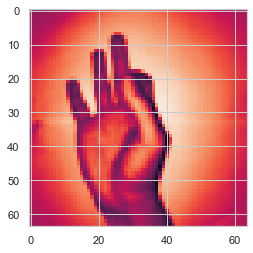

In [15]:
plt.imshow(X[0])

In [16]:
x_data=[]

for i in range (len(X)):
    #img = cv2.imread(X[i],cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(X[i], (50,50))
    #img= cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    #img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.expand_dims(img, axis=2)
    arr = np.array(img)
    x_data.append(arr) 
x_data=np.array(x_data)

After

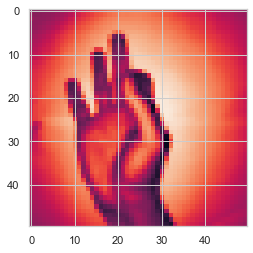

In [17]:
plt.imshow(x_data[0])

Image augmentation generators

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range = 15,
                                  width_shift_range = 0.1,height_shift_range =0.1,
                                  shear_range=0.3,zoom_range=0.3,horizontal_flip=True)

val_datagen = ImageDataGenerator(rotation_range = 15,
                                  width_shift_range = 0.1,height_shift_range =0.1,
                                  shear_range=0.3,zoom_range=0.3,horizontal_flip=True)

Split datasets to train and validation sets

In [19]:
#mnist
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(xtrain,train_labels, test_size = 0.1, random_state = 42,)

print (x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(24709, 50, 50, 1) (24709, 25) (2746, 50, 50, 1) (2746, 25)


In [20]:
#numbers
x2_train, x2_test, y2_train, y2_test = train_test_split(x_data,Y, test_size = 0.1, random_state = 42,)

print (x2_train.shape, y2_train.shape, x2_test.shape, y2_test.shape)
x3_train, x3_val, y3_train, y3_val = train_test_split(x2_train,y2_train, test_size = 0.1, random_state = 42,)

print (x3_train.shape, y3_train.shape, x3_val.shape, y3_val.shape)

(1855, 50, 50, 1) (1855, 10) (207, 50, 50, 1) (207, 10)
(1669, 50, 50, 1) (1669, 10) (186, 50, 50, 1) (186, 10)


Models

Convolutional neural network

In [21]:
import numpy as np 
np.random.seed(42)
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
#Convolutional nural net
model = Sequential()
model.add(Conv2D(32,(5,5),padding = 'same',input_shape=(50,50,1),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),padding = 'same',activation = 'swish'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(25,activation="softmax"))


model.summary()

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=254),
                              validation_data = val_datagen.flow(x_valid,y_valid),epochs=100,verbose=1,callbacks = [early_stopping])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

c:\users\kafra\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


98/98 [==============================] - 37s 367ms/step - loss: 2.9662 - accuracy: 0.1169 - val_loss: 1.8441 - val_accuracy: 0.4286
Epoch 2/100
98/98 [==============================] - 34s 346ms/step - loss: 1.5990 - accuracy: 0.4963 - val_loss: 1.0137 - val_accuracy: 0.6799
Epoch 3/100
98/98 [==============================] - 33s 336ms/step - loss: 0.8781 - accuracy: 0.7102 - val_loss: 0.6761 - val_accuracy: 0.7797
Epoch 4/100
98/98 [==============================] - 32s 329ms/step - loss: 0.5738 - accuracy: 0.8074 - val_loss: 0.4674 - val_accuracy: 0.8532
Epoch 5/100
98/98 [==============================] - 32s 322ms/step - loss: 0.4009 - accuracy: 0.8657 - val_loss: 0.3439 - val_accuracy: 0.8886
Epoch 6/100
98/98 [==============================] - 32s 322ms/step - loss: 0.2739 - accuracy: 0.9124 - val_loss: 0.2480 - val_accuracy: 0.9199
Epoch 7/100
98/98 [==============================] - 33s 335ms/step - loss: 0.2171 - accuracy: 0.9296 - val_loss: 0.1869 - val_accuracy: 0.9436
Epoc

In [22]:
model.evaluate(xtest,test_labels)

225/225 [==============================] - 3s 14ms/step - loss: 0.0026 - accuracy: 0.9992


[0.0025697057135403156, 0.9991633892059326]

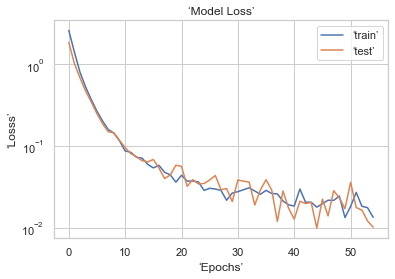

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('‘Model Loss’')
plt.ylabel('‘Losss’')
plt.xlabel('‘Epochs’')
plt.yscale("log")
plt.legend(['‘train’', '‘test’'])
plt.show()

Artificial neural network

In [24]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
model2=Sequential()
model2.add(Flatten(input_shape = (x_train.shape[1:])))

model2.add(Dense(1500, activation = "swish"))



model2.add(Dense(500, activation = "swish"))
model2.add(Dropout(0.1)) 

model2.add(Dense(300, activation = "swish"))

model2.add(Dense(100, activation = "swish"))
model2.add(Dense(50, activation = "swish"))

model2.add(Dense(25, activation = "softmax")) 
model2.summary()

model2.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history2 = model2.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=254),
                              validation_data = val_datagen.flow(x_valid,y_valid),epochs=100,verbose=1,callbacks = [early_stopping])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              3751500   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               750500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

Epoch 48/100
98/98 [==============================] - 10s 101ms/step - loss: 0.4848 - accuracy: 0.8371 - val_loss: 0.4673 - val_accuracy: 0.8460
Epoch 49/100
98/98 [==============================] - 10s 98ms/step - loss: 0.4805 - accuracy: 0.8436 - val_loss: 0.4106 - val_accuracy: 0.8645
Epoch 50/100
98/98 [==============================] - 10s 102ms/step - loss: 0.4470 - accuracy: 0.8500 - val_loss: 0.4187 - val_accuracy: 0.8602
Epoch 51/100
98/98 [==============================] - 10s 100ms/step - loss: 0.4456 - accuracy: 0.8522 - val_loss: 0.3748 - val_accuracy: 0.8765
Epoch 52/100
98/98 [==============================] - 10s 102ms/step - loss: 0.4877 - accuracy: 0.8373 - val_loss: 0.3832 - val_accuracy: 0.8718
Epoch 53/100
98/98 [==============================] - 10s 97ms/step - loss: 0.4300 - accuracy: 0.8549 - val_loss: 0.3731 - val_accuracy: 0.8722
Epoch 54/100
98/98 [==============================] - 10s 97ms/step - loss: 0.4105 - accuracy: 0.8628 - val_loss: 0.3187 - val_accur

In [25]:
model2.evaluate(xtest,test_labels)

225/225 [==============================] - 1s 4ms/step - loss: 0.1455 - accuracy: 0.9540


[0.14551378786563873, 0.953987717628479]

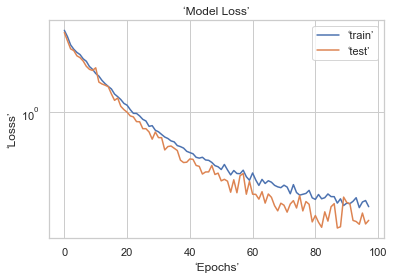

In [26]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('‘Model Loss’')
plt.ylabel('‘Losss’')
plt.xlabel('‘Epochs’')
plt.yscale("log")
plt.legend(['‘train’', '‘test’'])
plt.show()

In [27]:
#transfer learning of convolutional model to numbers dataset
model3 = Sequential()

for layer in model.layers[:-2]:
    layer.trainable = False 
    model3.add(layer)

model3.add(Dense(10, activation = 'softmax'))

model3.summary()

model3.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
early_stopping = EarlyStopping(patience =5, restore_best_weights = True,monitor='val_loss')

history3 = model3.fit(x3_train, y3_train, epochs = 100, batch_size = 254,
                      callbacks = [early_stopping], validation_data=(x3_val, y3_val)                   
                  )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)             

In [28]:
model3.evaluate(x2_test,y2_test)

7/7 [==============================] - 0s 10ms/step - loss: 0.1402 - accuracy: 0.9565


[0.14016641676425934, 0.95652174949646]

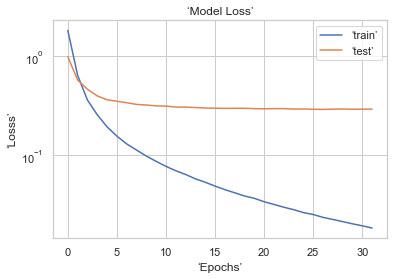

In [29]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('‘Model Loss’')
plt.ylabel('‘Losss’')
plt.xlabel('‘Epochs’')
plt.yscale("log")
plt.legend(['‘train’', '‘test’'])
plt.show()

Test of using the convolutional layers of the first model in svm,decision trees and knn clasifiers

In [30]:
model_feat = tf.keras.Model(inputs=model.input,outputs=model.get_layer('dense').output)
feat_train = model_feat.predict(xtrain)
feat_test= model_feat.predict(xtest)

In [31]:
#SVM
from sklearn import svm
svm = svm.SVC(kernel='rbf')
svm.fit(feat_train,np.argmax(train_labels,axis=1))

svm.score(feat_test,np.argmax(test_labels,axis=1))

0.9976296709425544

In [32]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=25, min_samples_leaf=5)
dt.fit(feat_train,np.argmax(train_labels,axis=1))

dt.score(feat_test,np.argmax(test_labels,axis=1))


0.8192972671500279

In [33]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(feat_train,np.argmax(train_labels,axis=-1))

knn.score(feat_test,np.argmax(test_labels,axis=1))

0.9965142219743447

Images taken from the video for prediction

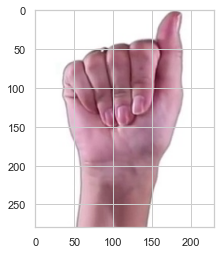

In [34]:
from PIL import Image
image = Image.open('frame6.jpg')
plt.imshow(image) #A,0

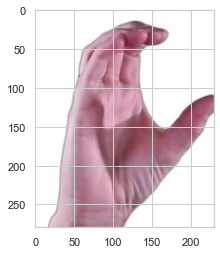

In [35]:
image = Image.open('frame7.jpg')
plt.imshow(image) #c,2

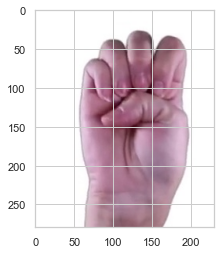

In [36]:
image = Image.open('frame8.jpg')
plt.imshow(image) #E,4

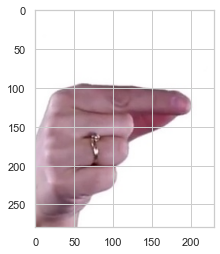

In [37]:
image = Image.open('frame9.jpg')
plt.imshow(image) #G,6

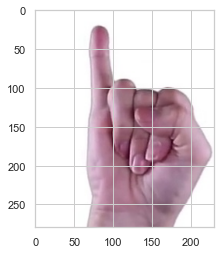

In [38]:
image = Image.open('frame10.jpg')
plt.imshow(image)#I,8

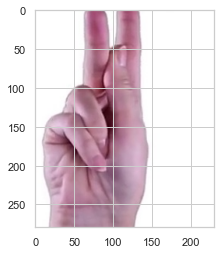

In [39]:
image = Image.open('frame11.jpg')
plt.imshow(image) #K,10

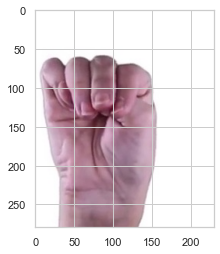

In [40]:
image = Image.open('frame12.jpg')
plt.imshow(image) #M,12

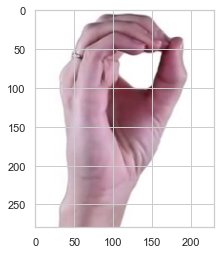

In [41]:
image = Image.open('frame13.jpg')
plt.imshow(image) #O,14

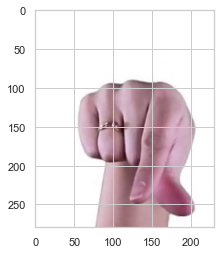

In [42]:
image = Image.open('frame14.jpg')
plt.imshow(image) #Q,16

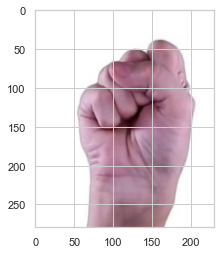

In [43]:
image = Image.open('frame15.jpg')
plt.imshow(image) #S,18

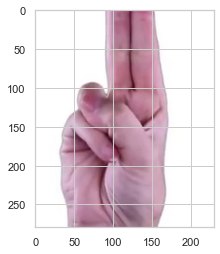

In [44]:
image = Image.open('frame16.jpg')
plt.imshow(image) #U,20

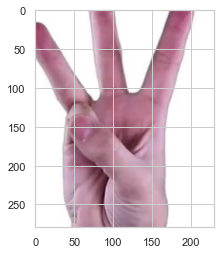

In [45]:
image = Image.open('frame17.jpg')
plt.imshow(image) #W,22

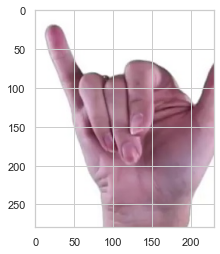

In [46]:
image = Image.open('frame18.jpg')
plt.imshow(image) #Y,24

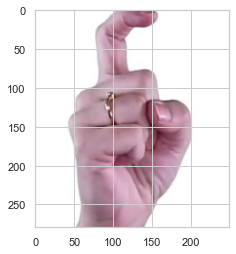

In [47]:
image = Image.open('frame19.jpg')
plt.imshow(image) #X,23

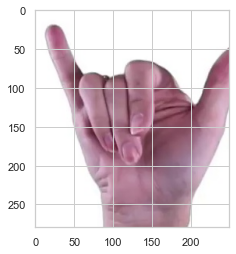

In [48]:
image = Image.open('frame20.jpg')
plt.imshow(image) #Y,24

In [49]:
realimages=[0,2,4,6,8,10,12,14,16,18,20,22,24,23,24]
realimages=np.array(realimages)

Predictions of each model on the images

In [50]:
predictedimages=[]
for i in range(6,21):
       # load the image
    image = Image.open('frame'+str(i)+'.jpg')

    image=np.array(image)
    image=cv2.resize(image, (50,50))
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image=gray_image.reshape(1,50,50,1)
    yy=model.predict(gray_image)
    predictedimages.append(np.argmax(yy))
    
predictedimages=np.array(predictedimages)
print('Real :',realimages,'Predicted:',predictedimages)

Real : [ 0  2  4  6  8 10 12 14 16 18 20 22 24 23 24] Predicted: [ 0  2  0  7 23 13  0 14  7 14 13 24 24 23 24]


In [51]:
predictedimages2=[]
for i in range(6,21):
       # load the image
    image = Image.open('frame'+str(i)+'.jpg')

    image=np.array(image)
    image=cv2.resize(image, (50,50))
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image=gray_image.reshape(1,50,50,1)
    yy=model2.predict(gray_image)
    predictedimages2.append(np.argmax(yy))   
predictedimages2=np.array(predictedimages2)
print('Real :',realimages,'Predicted:',predictedimages2)

Real : [ 0  2  4  6  8 10 12 14 16 18 20 22 24 23 24] Predicted: [16  2 16  7 16 16 16 16 16 16  2  5  0 23  8]


In [52]:
realnumberimages=[1,2,3,8]
predictedimages3=[]
for i in range(1,5):
       # load the image
    image = Image.open('number'+str(i)+'.jpg')

    image=np.array(image)
    image=cv2.resize(image, (50,50))
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image=gray_image.reshape(1,50,50,1)
    yy=model3.predict(gray_image)
    predictedimages3.append(np.argmax(yy))
predictedimages3=np.array(predictedimages3)
print('Real :',realnumberimages,'Predicted:',predictedimages3)

Real : [1, 2, 3, 8] Predicted: [1 6 6 6]


Live predictions on video

In [55]:
#Video link : https://www.youtube.com/watch?v=6_gXiBe9y9A&t=23s

cap = cv2.VideoCapture('Learn ASL Alphabet Video.mp4')
object_detector = cv2.createBackgroundSubtractorMOG2(history=300,varThreshold = 15)# detects object from a stable camera
count = 0
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    ret , frame = cap.read()
    

    height,width,_=frame.shape
    #print(height,width)
    #extract roi
    #roi=frame[220:500,550:780] area of interet for pictures
#    cv2.imwrite("frame%d.jpg" % count, roi) #remove the hashtage to take pictures
    count += 1
#    cap.set(cv2.CAP_PROP_POS_FRAMES, count * 150) # on what frames the pictures will be shot
    
    #object detection
    mask= object_detector.apply(frame)
    
    contours,_=cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if count > 600 :
        for cnt in contours:
            area=cv2.contourArea(cnt)
            if area > 2000 :
            
                x,y,w,h= cv2.boundingRect(cnt)
                
                gray_fr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
             
                fc = gray_fr[(y-20):y+h, (x-30):(x+w+20)] 
                
                roii = cv2.resize(fc, (50, 50))
                pred = model.predict(roii[np.newaxis, :, :, np.newaxis])
                
                predd= np.argmax(pred)

                cv2.putText(frame,str( predd), (x-100, y), font, 1, (255, 255, 0), 2)
                cv2.rectangle(frame,(x-30,y-20),(x+w+20,y+h),(255,0,0),2)
               
    #cv2.imshow("roi",roi)        
    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    key =  cv2.waitKey(30)
    if key == 27 : #pataw esc gia na stamathsei
        break
        
 #       
cap.release()
cv2.destroyAllWindows

KeyboardInterrupt: 